In [1]:
#installing shap library
# !pip install shap

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
sns.set()
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
# import shap
from sklearn import metrics
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#Importing dataset
df = pd.read_csv('/content/drive/MyDrive/ime692_project.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# checking null value in dataset
df.isnull().sum()

State                   0
County                  0
IT_WholeRate            0
HighSchool_WholeRate    0
MedianInc_WholeAvg      0
republican_rate         0
Segregation             0
urban                   0
racial_weighted_bias    0
hesitancy               0
HighSchool_Disparity    0
IT_Disparity            0
MedianInc_Disparity     0
CvdVax_DisparityY       0
vehicle                 0
FacNumRate              0
CaseRate                0
Black_Prop              0
Test                    0
dtype: int64

In [7]:
df.shape

(756, 19)

In [8]:
# Visualization of data
df.head()

,State,County,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,CvdVax_DisparityY,vehicle,FacNumRate,CaseRate,Black_Prop,Test
0,California,Alameda,91.4,88.4,99.406,1770.559475,49.890444,1,33.258827,9,5.7,10.7,62.678,16.768796,90.4,0.017292,5.114553,11.031221,0
1,California,Butte,89.1,89.2,52.537,4775.484604,62.099507,1,36.520664,13,0.7,6.4,24.189,13.494706,92.8,0.017793,5.288203,1.897019,0
2,California,Colusa,86.5,71.3,59.401,5726.667504,19.219010,0,37.223305,14,18.7,-0.6,39.137,15.707145,94.6,0.018564,10.205597,1.308767,0
3,California,Contra Costa,93.8,89.5,99.716,2630.232438,52.702580,1,37.082206,9,4.9,6.2,44.922,17.678572,94.5,0.014044,5.817034,9.541527,1
4,California,Del Norte,84.0,80.1,45.283,5641.809291,35.769303,0,36.879187,15,21.5,-12.6,-57.687,23.012579,90.4,0.028765,4.631094,3.523659,0


In [ ]:
# information about variable and there nature 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 756 non-null    object 
 1   County                756 non-null    object 
 2   IT_WholeRate          756 non-null    float64
 3   HighSchool_WholeRate  756 non-null    float64
 4   MedianInc_WholeAvg    756 non-null    float64
 5   republican_rate       756 non-null    float64
 6   Segregation           756 non-null    float64
 7   urban                 756 non-null    int64  
 8   racial_weighted_bias  756 non-null    float64
 9   hesitancy             756 non-null    int64  
 10  HighSchool_Disparity  756 non-null    float64
 11  IT_Disparity          756 non-null    float64
 12  MedianInc_Disparity   756 non-null    float64
 13  CvdVax_DisparityY     756 non-null    float64
 14  vehicle               756 non-null    float64
 15  FacNumRate            7

In [ ]:
# Descriptive Statistical summary
df.describe()

,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,CvdVax_DisparityY,vehicle,FacNumRate,CaseRate,Black_Prop,Test
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,82.684392,86.930820,58.447962,5874.873493,44.852159,0.603175,39.993086,17.677249,6.761508,8.307672,21.002967,12.118775,92.914418,0.023596,9.469008,12.396693,0.297619
std,7.052813,5.305236,16.596879,1606.470548,16.124775,0.489563,1.878899,3.798440,7.880749,10.520125,16.108802,10.354706,4.961696,0.011829,2.656731,13.136235,0.457514
min,55.600000,61.800000,27.063000,1124.920105,0.040823,0.000000,31.156179,7.000000,-30.300000,-21.900000,-67.705000,-18.168016,23.000000,0.000000,2.234984,0.540638,0.000000
25%,78.775000,83.975000,48.006250,4808.005385,33.276618,0.000000,39.198748,15.000000,2.400000,2.100000,13.660250,4.921826,91.800000,0.016730,7.720216,3.102765,0.000000
50%,83.400000,87.900000,54.517000,6041.350921,45.830869,1.000000,40.176702,18.000000,6.200000,7.700000,21.828000,10.451356,93.700000,0.020966,9.527030,7.429402,0.000000
75%,87.600000,90.900000,64.080500,7155.022414,56.441026,1.000000,40.888016,20.000000,10.700000,14.000000,29.513500,17.756555,95.200000,0.026486,11.116103,16.912766,1.000000
max,97.000000,96.800000,142.299000,8932.443703,86.158768,1.000000,44.452995,27.000000,42.200000,72.300000,112.332000,53.842225,98.600000,0.098090,24.159065,76.973139,1.000000


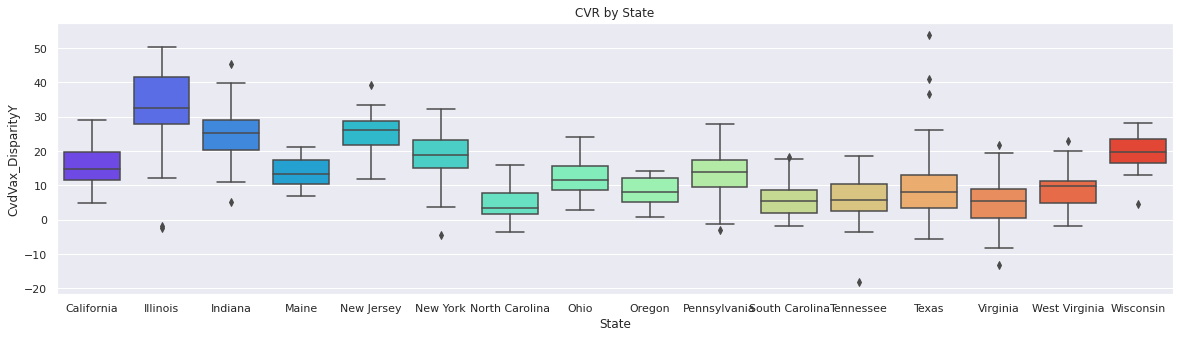

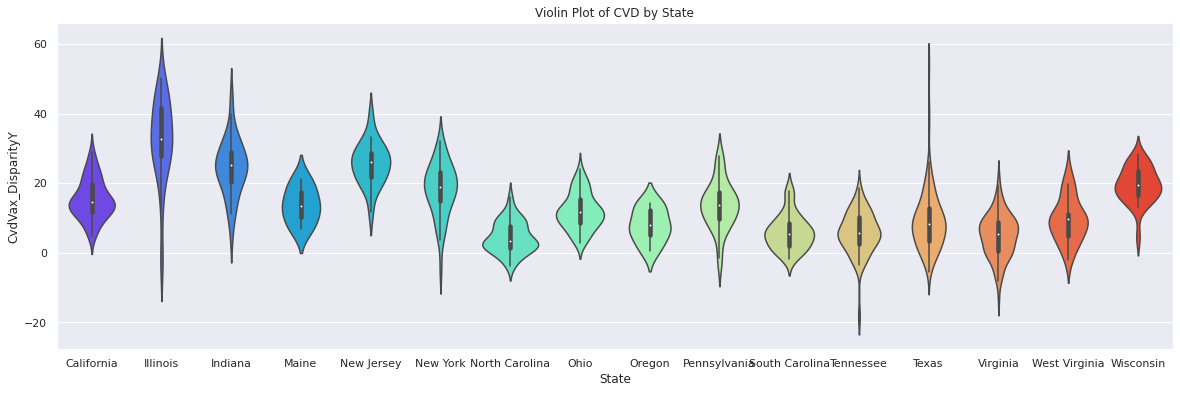

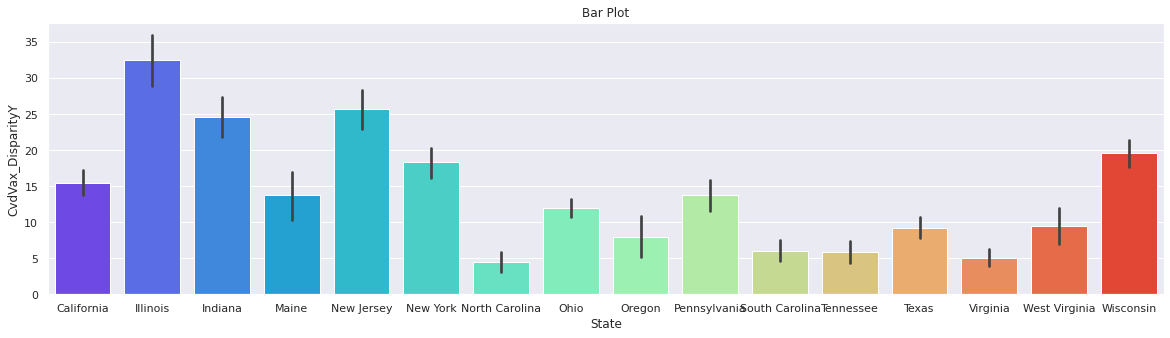

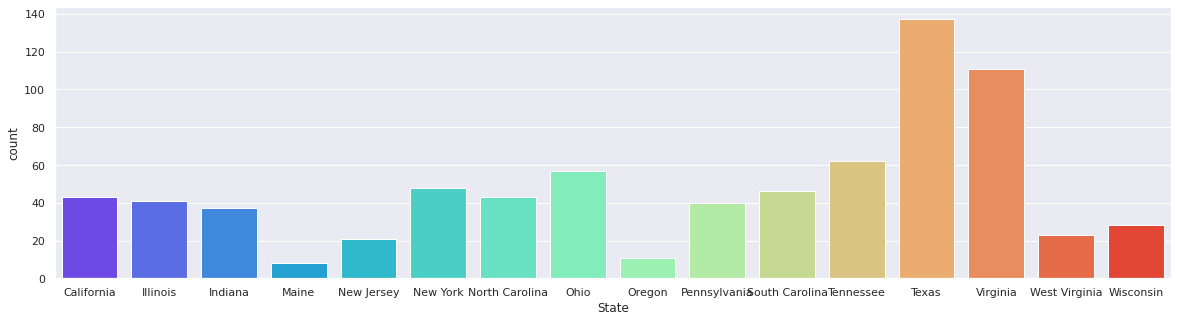

In [9]:
#Visualizing Categorical features with Box plot,Violine plot, Bar plot and state variale bar plot
plt.figure(figsize=(20,5))
sns.boxplot(x='State',y='CvdVax_DisparityY',data=df, palette='rainbow')
plt.title("CVR by State")

plt.figure(figsize=(20,6))
sns.violinplot(x='State',y='CvdVax_DisparityY',data=df, palette='rainbow')
plt.title("Violin Plot of CVD by State")

plt.figure(figsize=(20,5))
sns.barplot(x='State',y='CvdVax_DisparityY',data=df, palette='rainbow')
plt.title("Bar Plot")

plt.figure(figsize=(20,5))
sns.countplot(x='State',data=df, palette='rainbow')

In [ ]:
#Visualizing categorical features
df['County'].value_counts()

Washington         8
Marion             8
Montgomery         7
Jefferson          7
Fayette            6
                  ..
Lackawanna         1
Charlotte          1
Marin              1
Lincoln            1
Waynesboro city    1
Name: County, Length: 579, dtype: int64

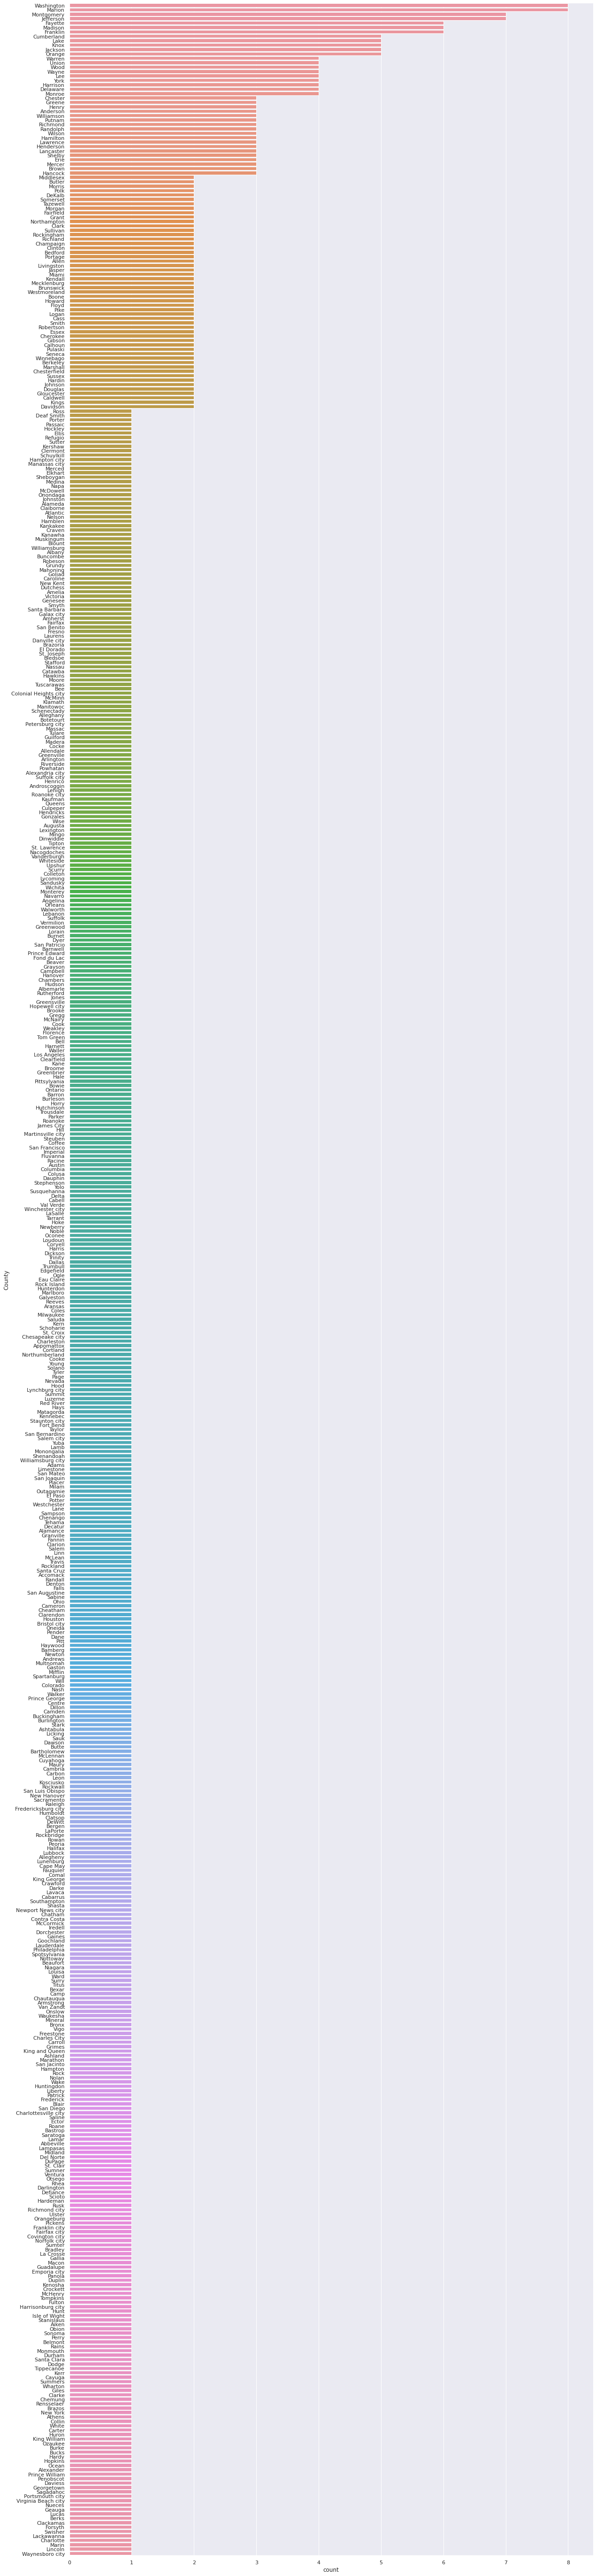

In [ ]:
# categorical variable county visualization
plt.figure(figsize=(20,100))
sns.countplot(y='County', data=df,order = df['County'].value_counts().index, orient="v")

In [ ]:
df['County'] = df.County.str.replace(' ', '_')

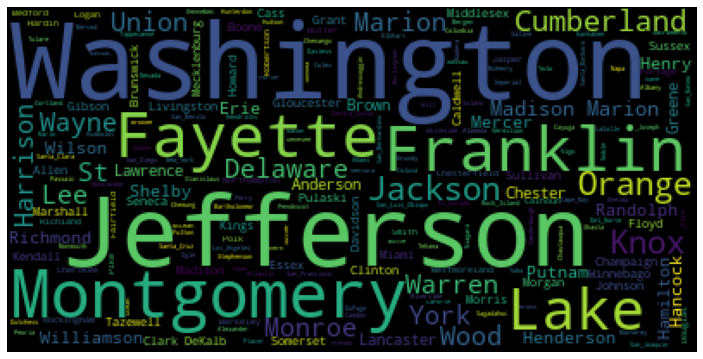

In [ ]:
# categorical variable visualization in wordcloud
plt.figure(figsize=(10,8))
wordcloud = WordCloud().generate(' '.join(df['County']))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

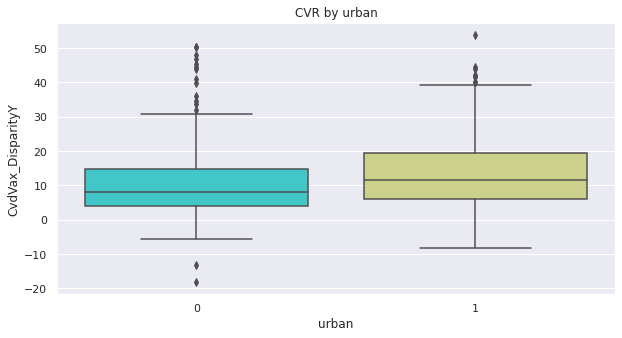

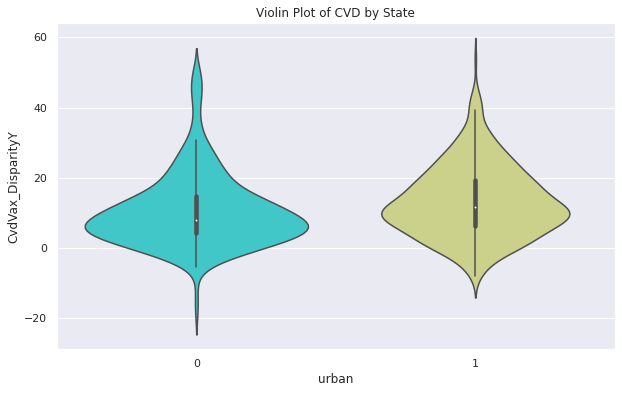

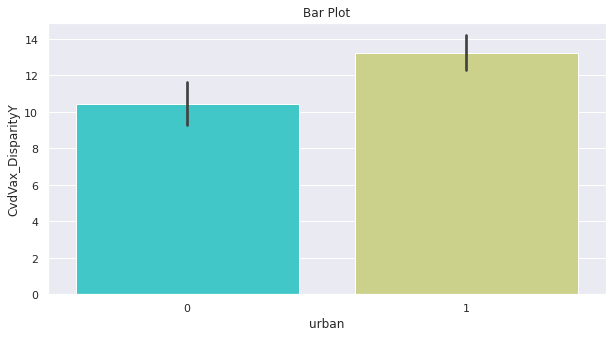

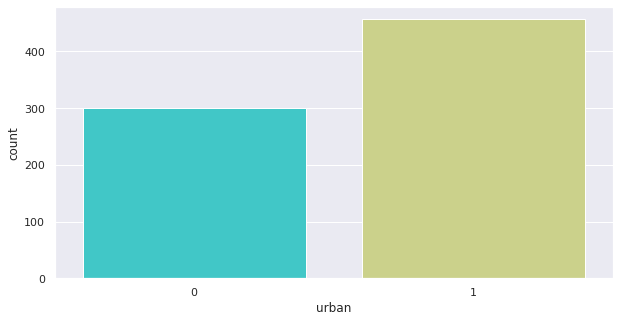

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='urban',y='CvdVax_DisparityY',data=df, palette='rainbow')
plt.title("CVR by urban")

plt.figure(figsize=(10,6))
sns.violinplot(x='urban',y='CvdVax_DisparityY',data=df, palette='rainbow')
plt.title("Violin Plot of CVD by State")

plt.figure(figsize=(10,5))
sns.barplot(x='urban',y='CvdVax_DisparityY',data=df, palette='rainbow')
plt.title("Bar Plot")

plt.figure(figsize=(10,5))
sns.countplot(x='urban',data=df, palette='rainbow')

In [ ]:
# correlation Matrix among variable
cor = df.corr()
cor

,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,CvdVax_DisparityY,vehicle,FacNumRate,CaseRate,Black_Prop,Test
IT_WholeRate,1.000000,0.623028,0.709171,-0.335680,0.269876,0.499304,-0.240044,-0.445531,-0.041143,-0.263755,0.157159,0.301044,0.143630,-0.292671,-0.182055,-0.377663,0.038056
HighSchool_WholeRate,0.623028,1.000000,0.495551,-0.251336,0.245171,0.363985,-0.091601,-0.274402,0.029831,-0.126878,0.130846,0.209335,0.152894,-0.154140,-0.332399,-0.227986,0.006584
MedianInc_WholeAvg,0.709171,0.495551,1.000000,-0.367793,0.023221,0.472975,-0.150170,-0.625040,-0.023987,-0.121321,0.274783,0.163357,0.177019,-0.389950,-0.223387,-0.243283,0.038659
republican_rate,-0.335680,-0.251336,-0.367793,1.000000,-0.061257,-0.411862,0.179865,0.554479,-0.146918,-0.003880,-0.314579,-0.299938,0.363631,0.111648,0.204671,-0.392296,0.009507
Segregation,0.269876,0.245171,0.023221,-0.061257,1.000000,0.082382,-0.307119,-0.041322,0.006398,-0.245517,0.058659,0.430290,-0.219164,0.062639,0.026499,-0.389603,0.048238
urban,0.499304,0.363985,0.472975,-0.411862,0.082382,1.000000,-0.057608,-0.345322,-0.075612,0.007484,0.212148,0.131373,-0.001786,-0.268645,-0.094807,-0.012182,-0.033791
racial_weighted_bias,-0.240044,-0.091601,-0.150170,0.179865,-0.307119,-0.057608,1.000000,0.255602,0.027380,0.221113,0.030788,-0.172145,0.081152,0.052218,0.297604,0.418495,-0.039228
hesitancy,-0.445531,-0.274402,-0.625040,0.554479,-0.041322,-0.345322,0.255602,1.000000,-0.141664,0.022203,-0.244628,-0.290513,0.079492,0.256906,0.366295,0.083989,-0.058214
HighSchool_Disparity,-0.041143,0.029831,-0.023987,-0.146918,0.006398,-0.075612,0.027380,-0.141664,1.000000,0.266556,0.210356,0.192191,-0.092084,-0.039784,0.022950,0.121136,-0.035794
IT_Disparity,-0.263755,-0.126878,-0.121321,-0.003880,-0.245517,0.007484,0.221113,0.022203,0.266556,1.000000,0.338592,-0.150564,0.001676,-0.036477,0.001280,0.273274,-0.012638


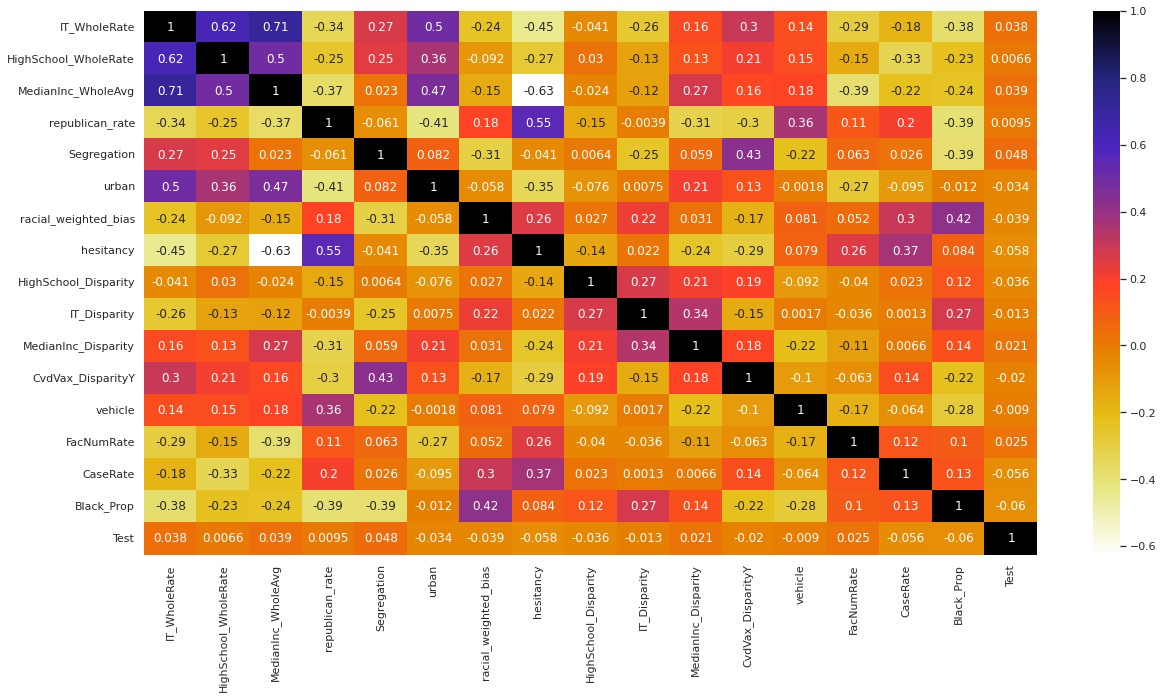

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [10]:
# Due to high correlation factor drop the variable "HighSchool_WholeRate","MedianInc_WholeAvg"
df = df.drop(["HighSchool_WholeRate","MedianInc_WholeAvg"], axis=1)

In [11]:
numvars = df.select_dtypes(include='number').columns
numvars = numvars.drop(['Test','urban'])
numvars

Index(['IT_WholeRate', 'republican_rate', 'Segregation',
       'racial_weighted_bias', 'hesitancy', 'HighSchool_Disparity',
       'IT_Disparity', 'MedianInc_Disparity', 'CvdVax_DisparityY', 'vehicle',
       'FacNumRate', 'CaseRate', 'Black_Prop'],
      dtype='object')

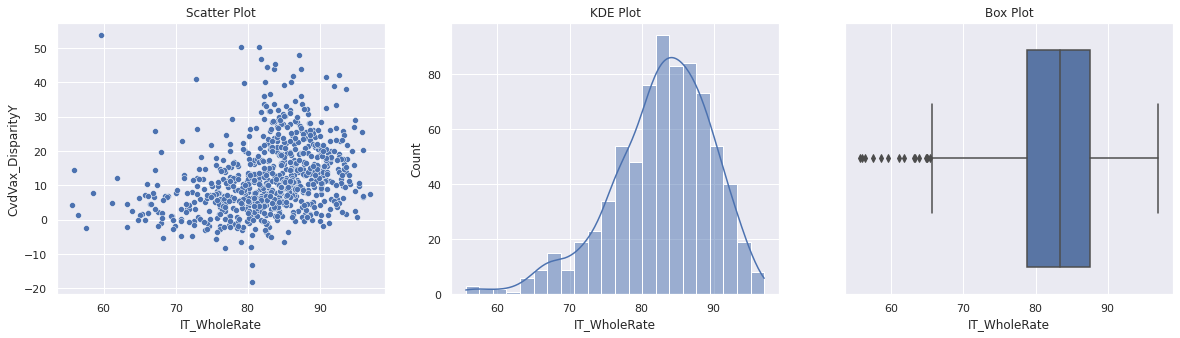

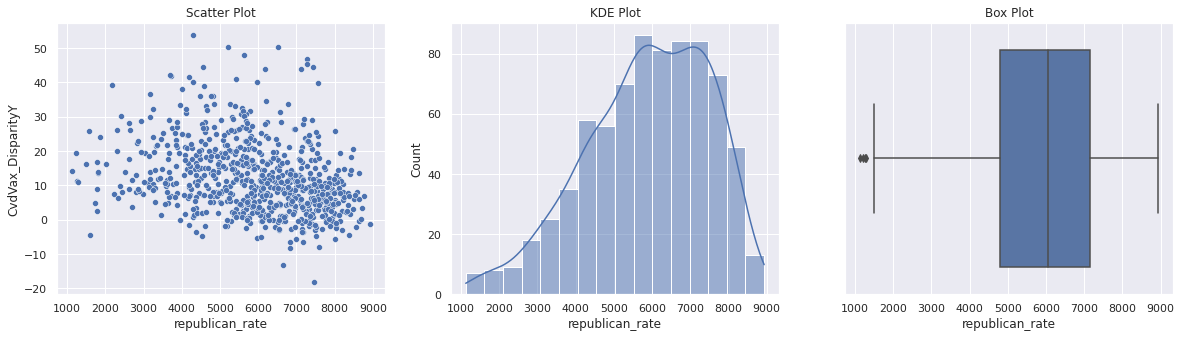

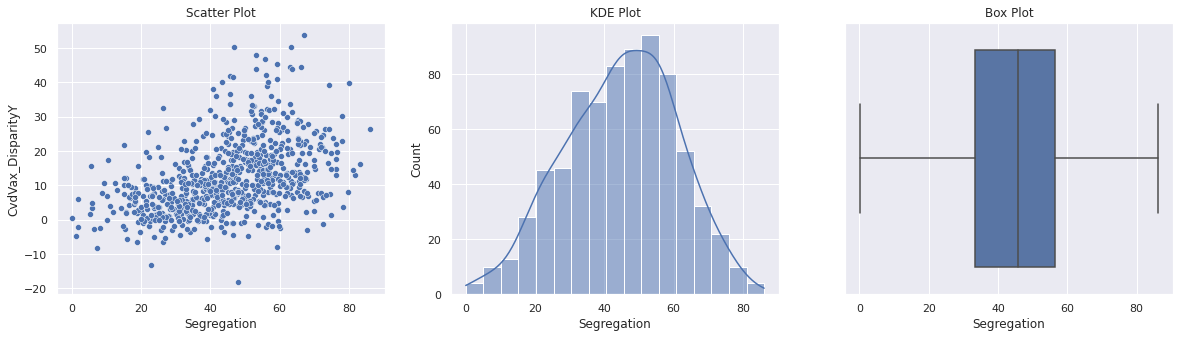

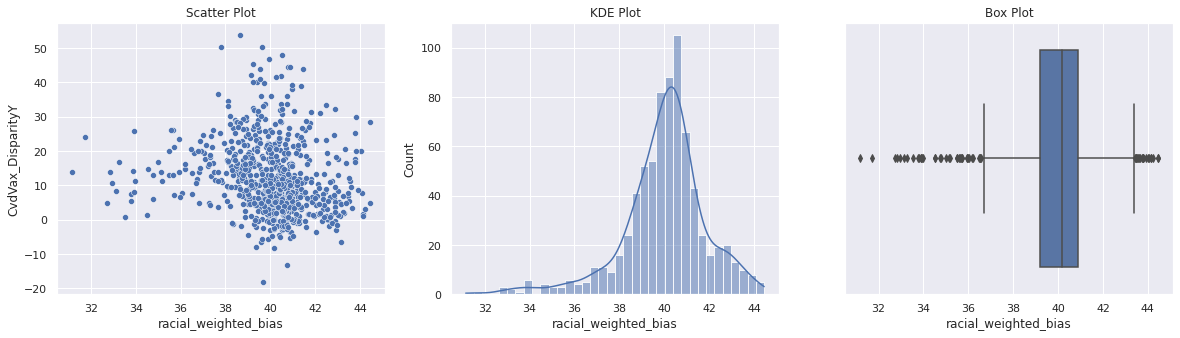

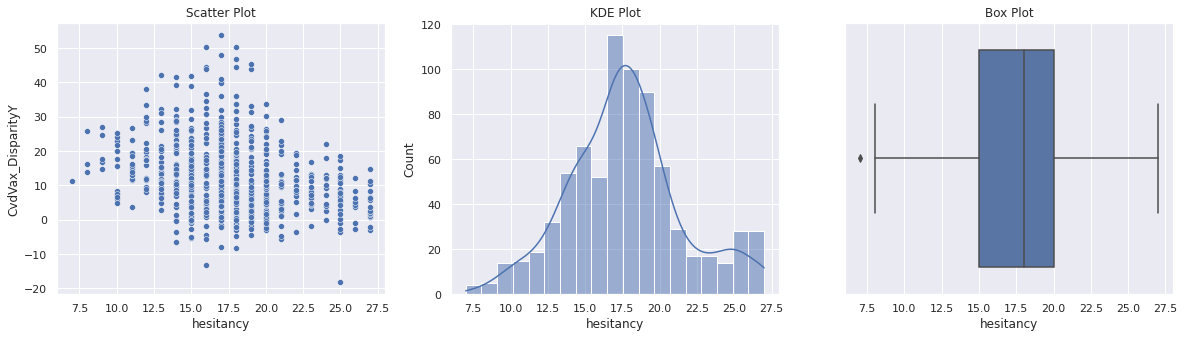

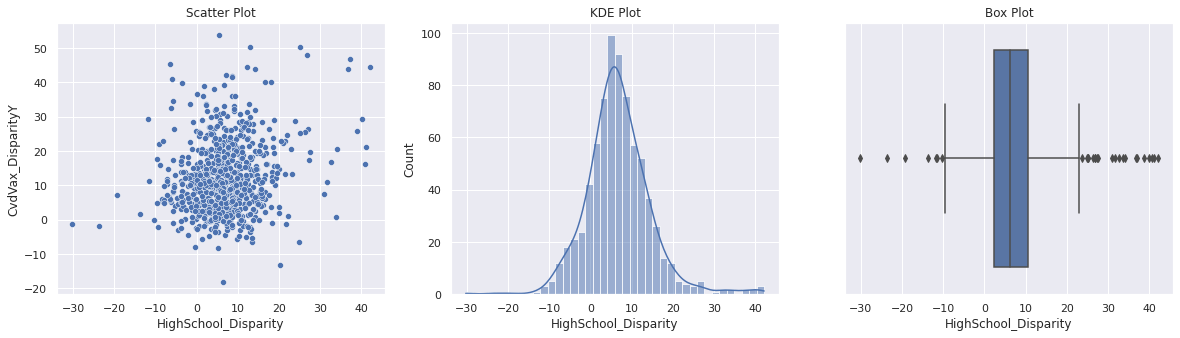

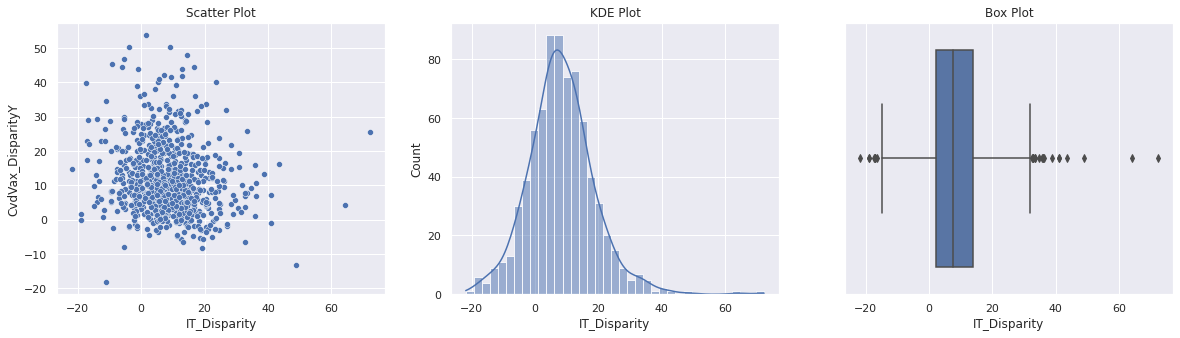

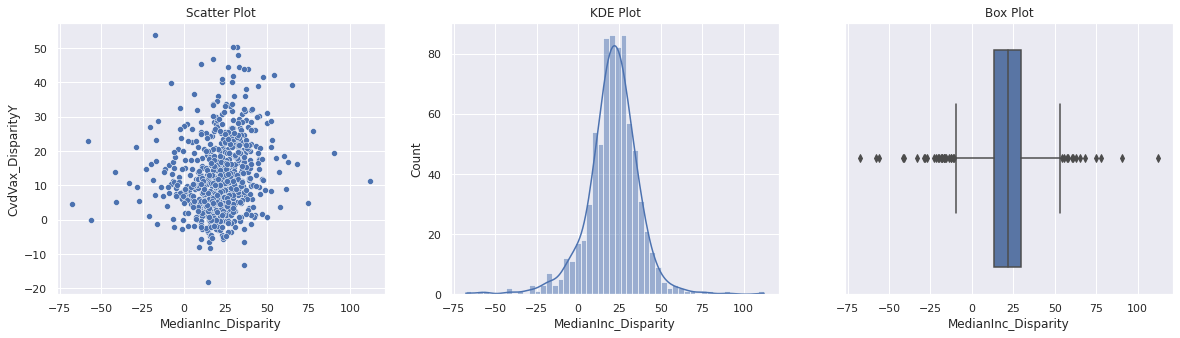

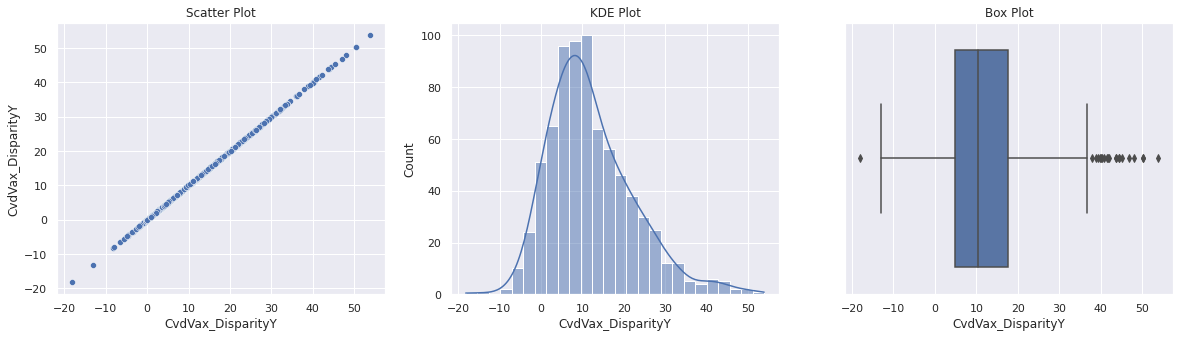

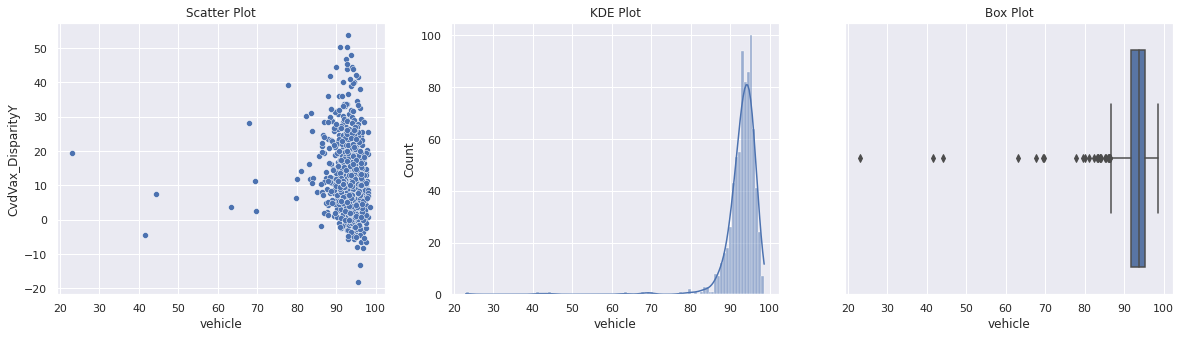

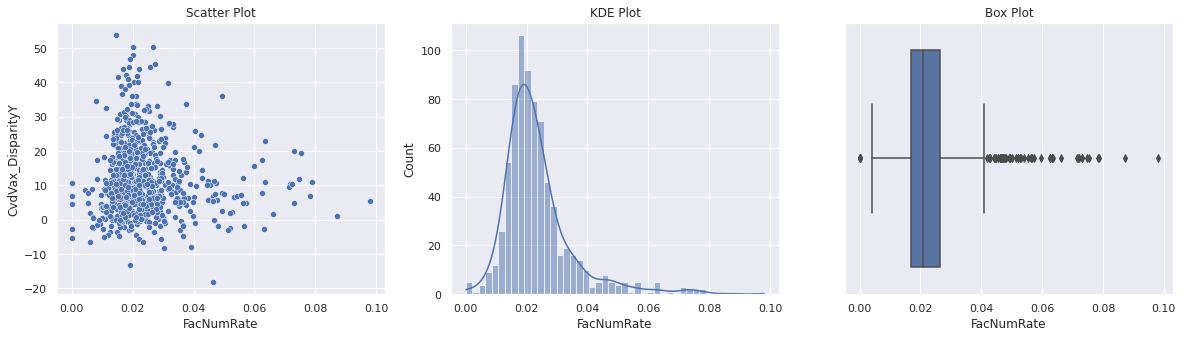

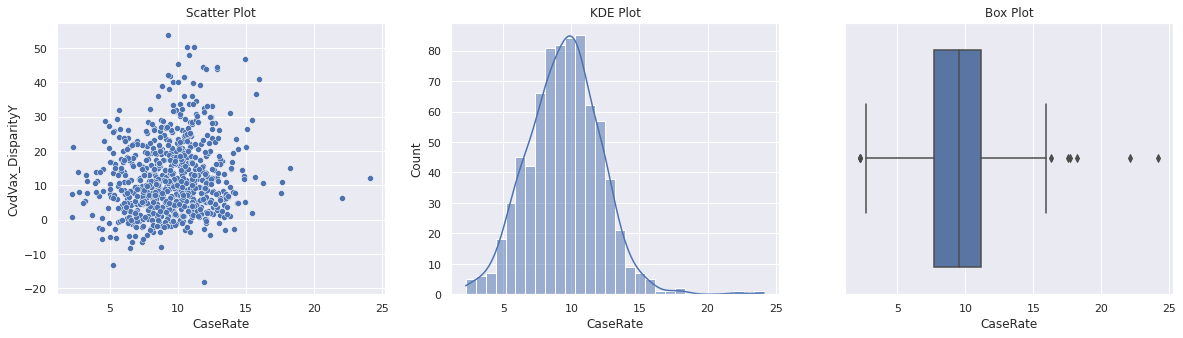

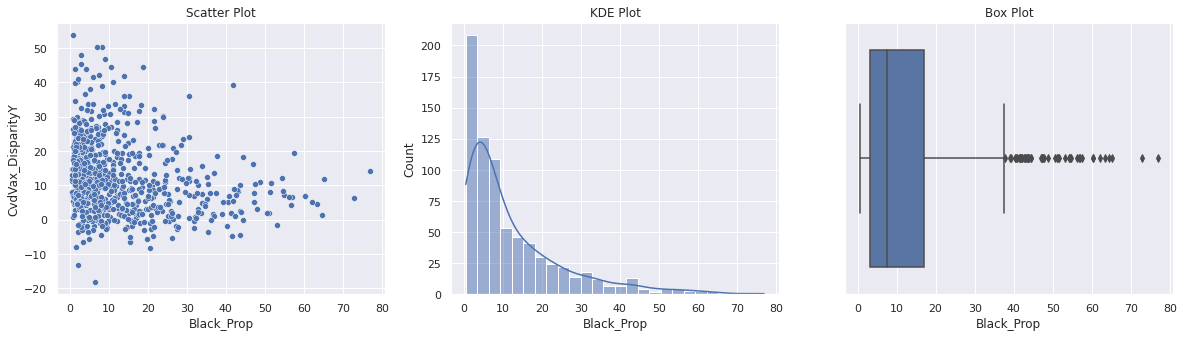

In [ ]:
#Visualizing the dataset scatter plots, dist plots, boxplots to check linearity ,Normility and outlier 
for var in numvars:
  fig, axes = plt.subplots(1,3,figsize=(20, 5))
  sns.scatterplot(ax=axes[0], data=df,x=var,y='CvdVax_DisparityY')
  axes[0].set_title("Scatter Plot")
  sns.histplot(ax=axes[1], data=df, x=var, kde=True)
  axes[1].set_title("KDE Plot")
  sns.boxplot(ax=axes[2],x=var,data=df)
  axes[2].set_title("Box Plot")

In [12]:
#Transforming to each variable in normal distribution with yeo-johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df_t = df.copy()
df_t[numvars] = pt.fit_transform(df_t[numvars])

In [13]:
#OneHot Encoding of categorical variable state
df_t = pd.get_dummies(df_t, columns=['State'])
df_t = df_t.drop(['County'],axis = 1)

In [ ]:
df_t.head()

,IT_WholeRate,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,CvdVax_DisparityY,vehicle,FacNumRate,CaseRate,Black_Prop,Test,State_California,State_Illinois,State_Indiana,State_Maine,State_New Jersey,State_New York,State_North Carolina,State_Ohio,State_Oregon,State_Pennsylvania,State_South Carolina,State_Tennessee,State_Texas,State_Virginia,State_West Virginia,State_Wisconsin
0,1.405357,-2.154140,0.299814,1,-2.726134,-2.513754,-0.116523,0.254834,2.948321,0.505319,-1.062015,-0.524294,-1.699953,0.381842,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.955472,-0.761808,1.078629,1,-1.720076,-1.257601,-0.755456,-0.143617,0.154363,0.211097,-0.318332,-0.456078,-1.626352,-1.242548,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.486829,-0.180101,-1.572445,0,-1.444380,-0.967049,1.492991,-0.824641,1.206509,0.411079,0.405236,-0.353917,0.304325,-1.524376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.912092,-1.833962,0.477872,1,-1.501634,-2.513754,-0.217451,-0.162369,1.626301,0.585272,0.360700,-1.001984,-1.405062,0.240934,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.074000,-0.234409,-0.580210,0,-1.582328,-0.684103,1.834874,-2.165993,-3.357568,1.041123,-1.062015,0.732929,-1.907506,-0.708124,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
#To remove outliers we use IQR and plot the box plot of each variable before removing and after removing outlier
df_nout = df_t.copy()

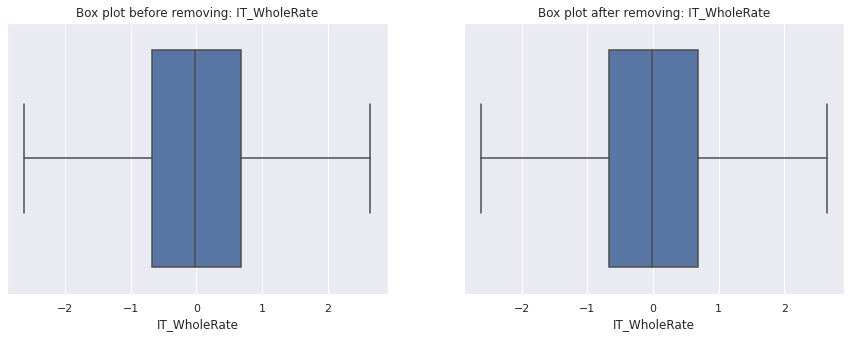

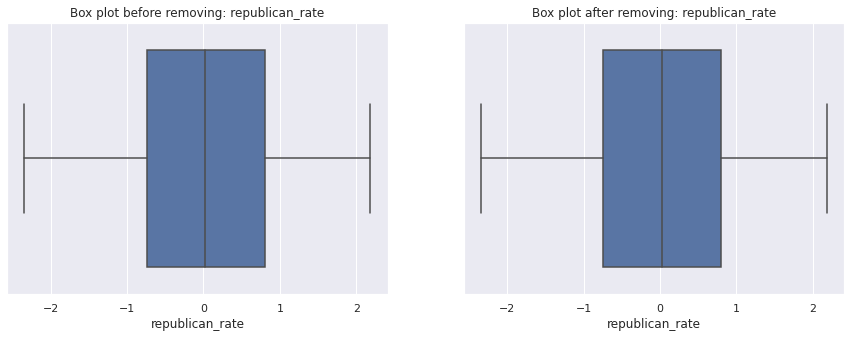

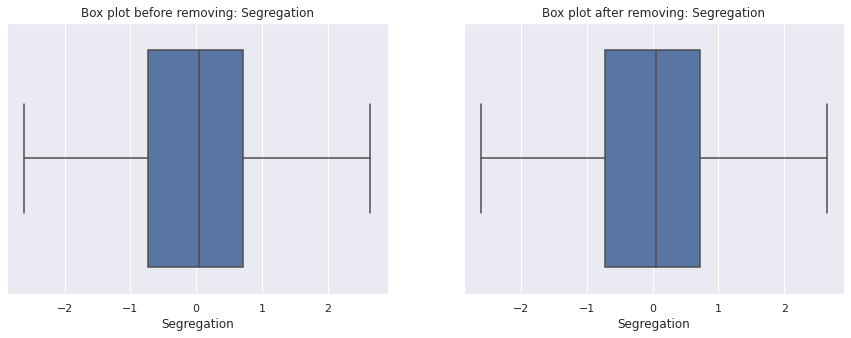

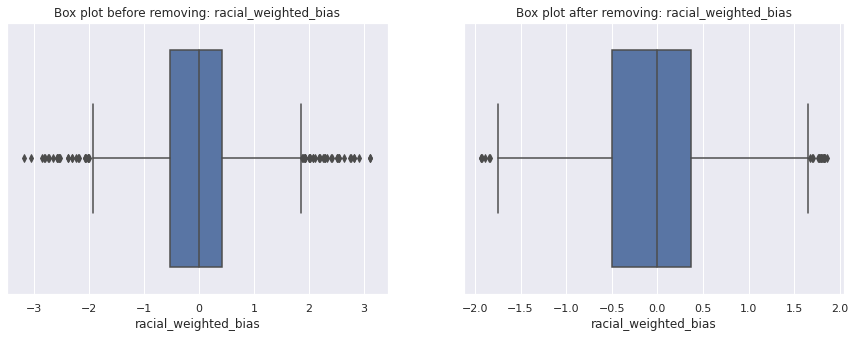

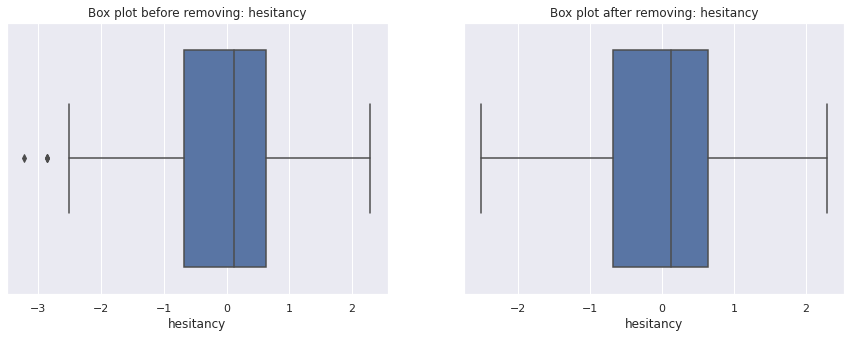

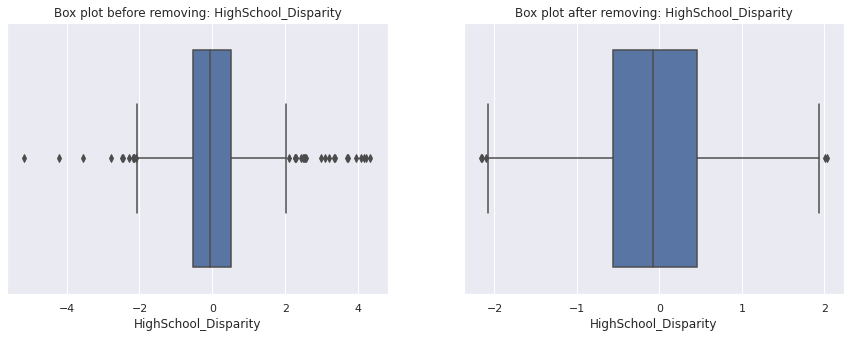

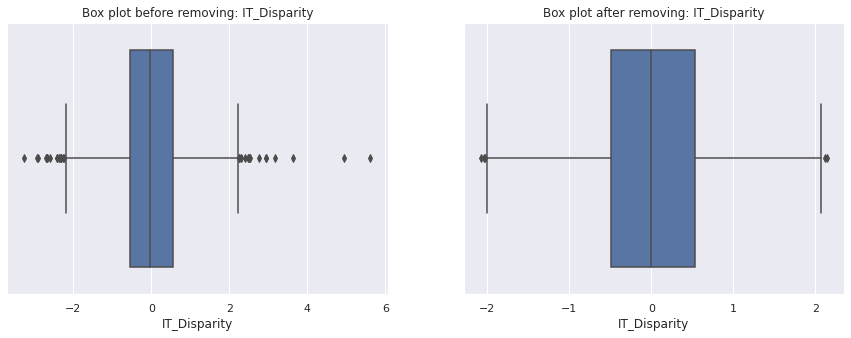

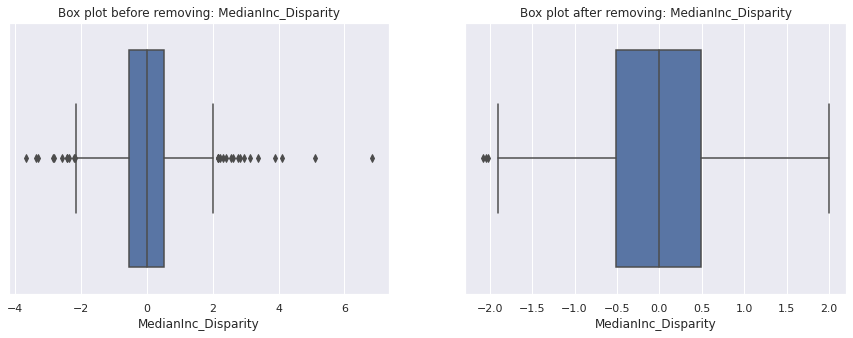

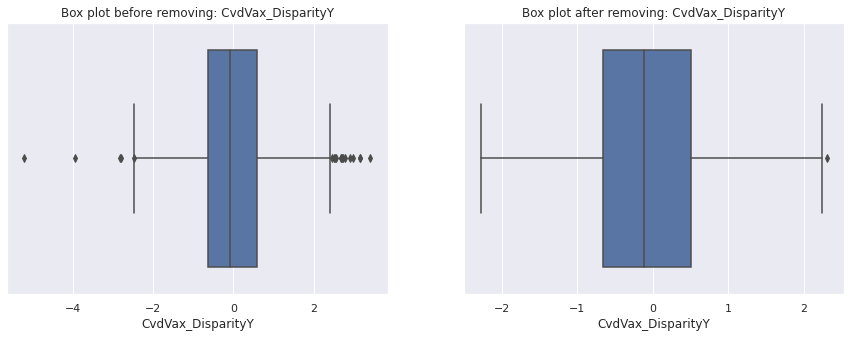

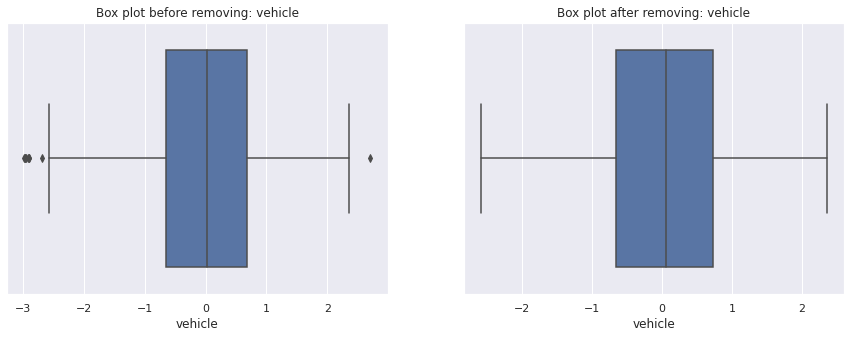

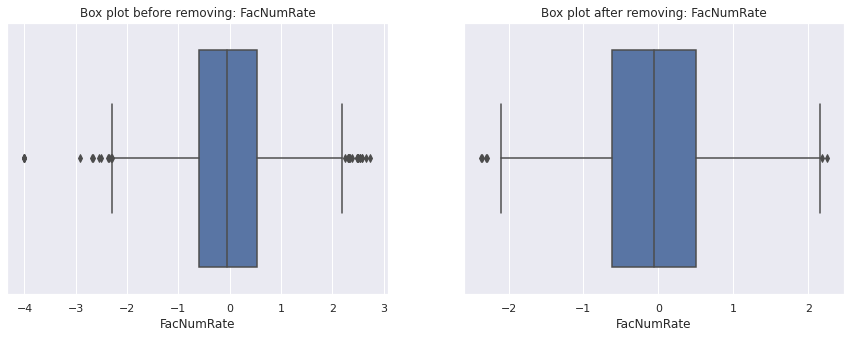

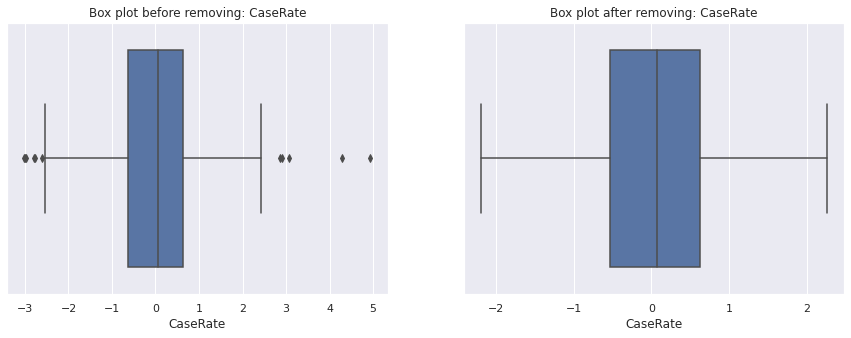

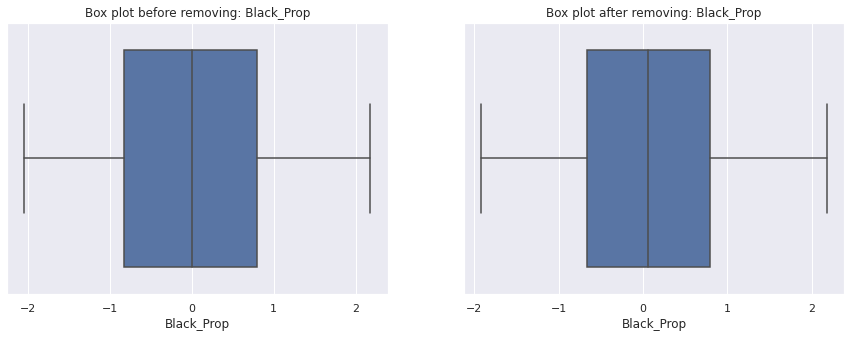

In [23]:
for var in numvars:
  fig, axes = plt.subplots(1,2,figsize=(15, 5))
  percentile25 = df_nout[var].quantile(0.25)
  percentile75 = df_nout[var].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  df_nout = df_nout.loc[(df_nout[var] < upper_limit) & (df_nout[var] > lower_limit)]
  axes[0].set_title("Box plot before removing: "+ var)
  sns.boxplot(ax=axes[0], data = df_t, x=var)
  axes[1].set_title("Box plot after removing: " + var)
  sns.boxplot(ax=axes[1], data = df_nout, x=var)

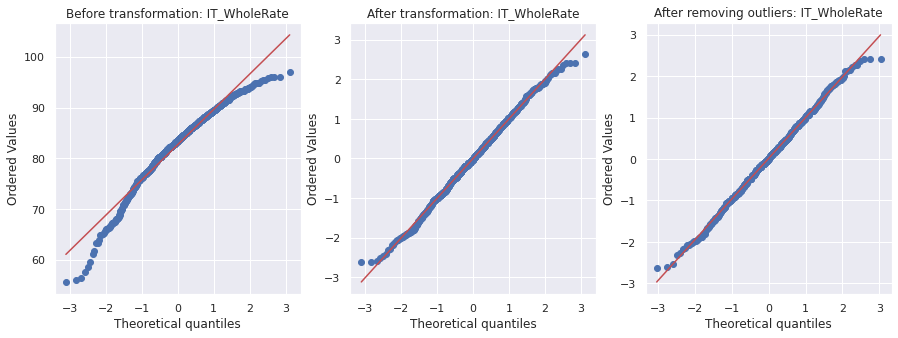

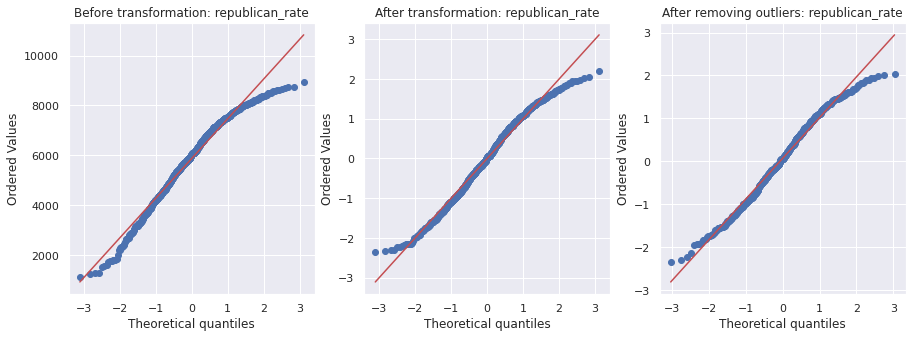

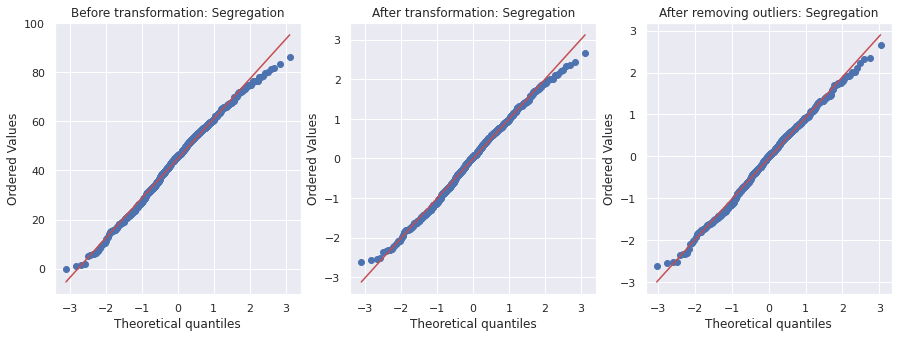

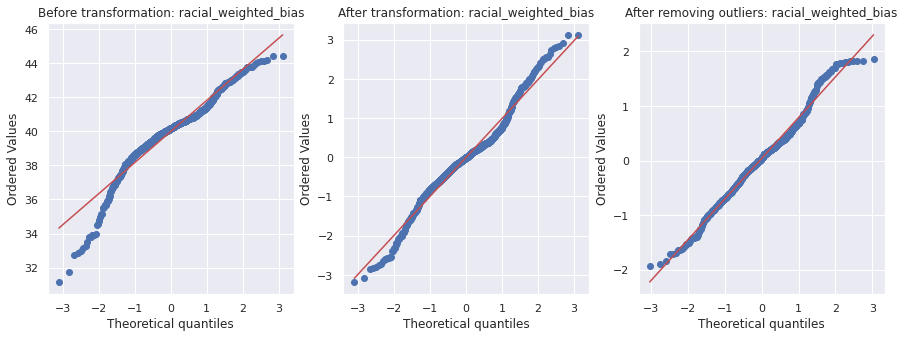

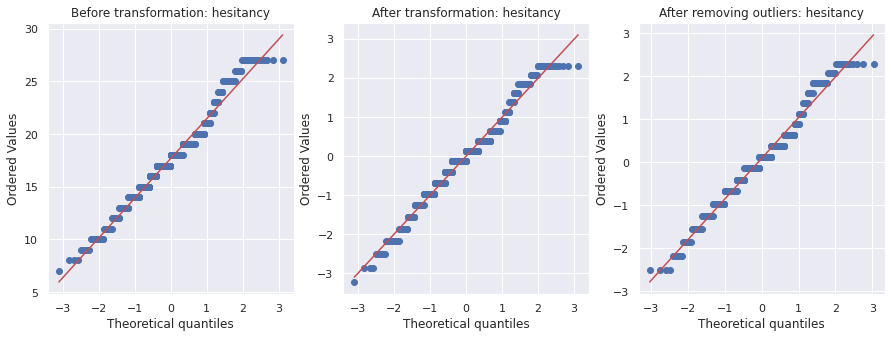

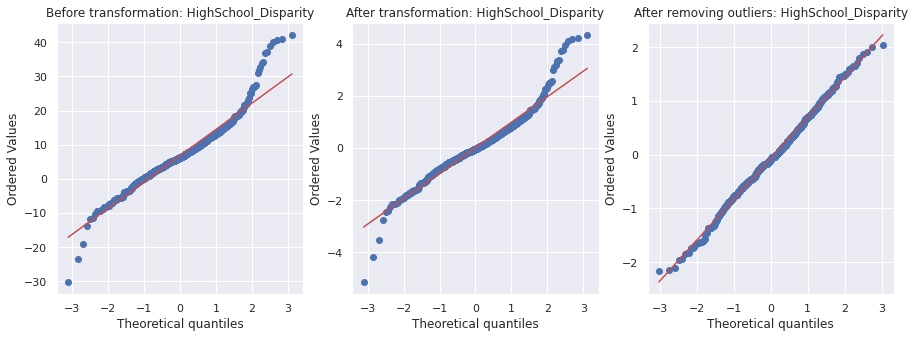

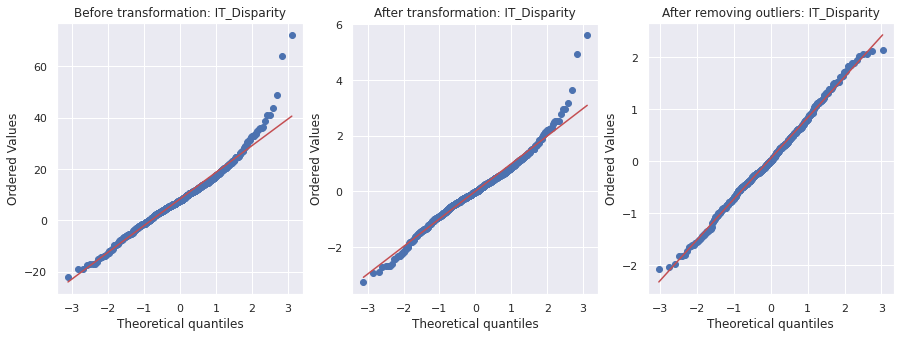

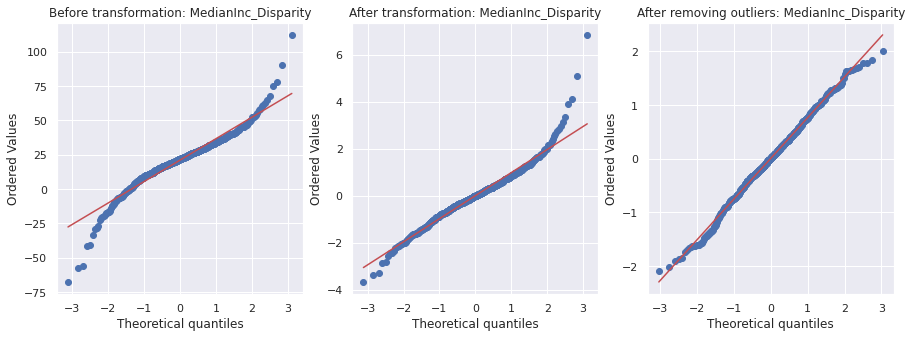

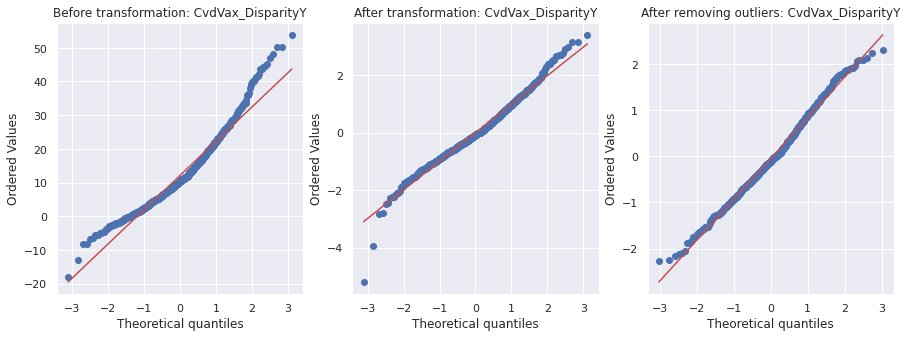

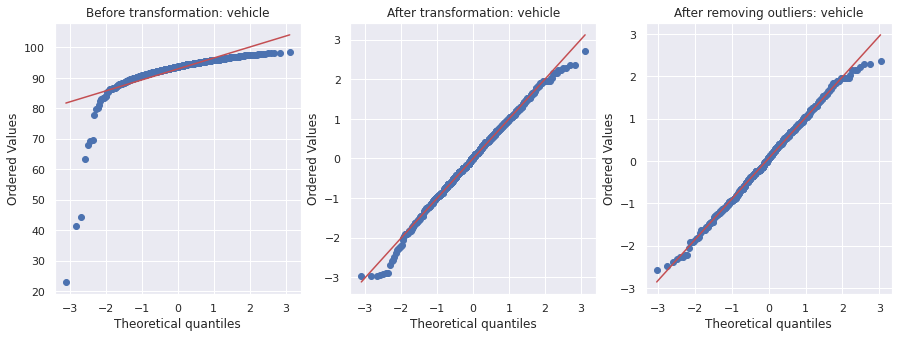

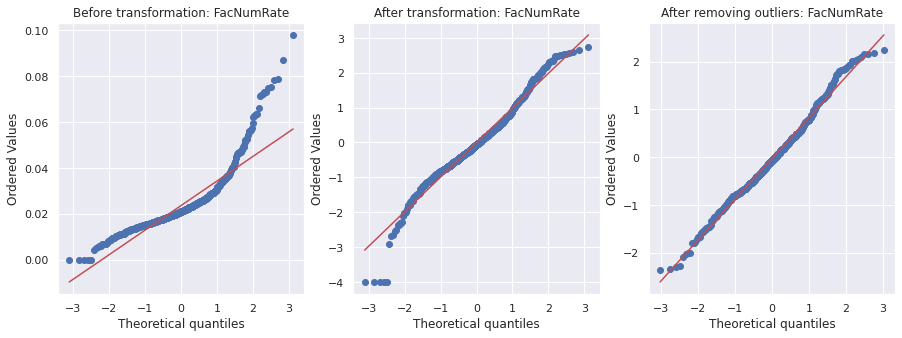

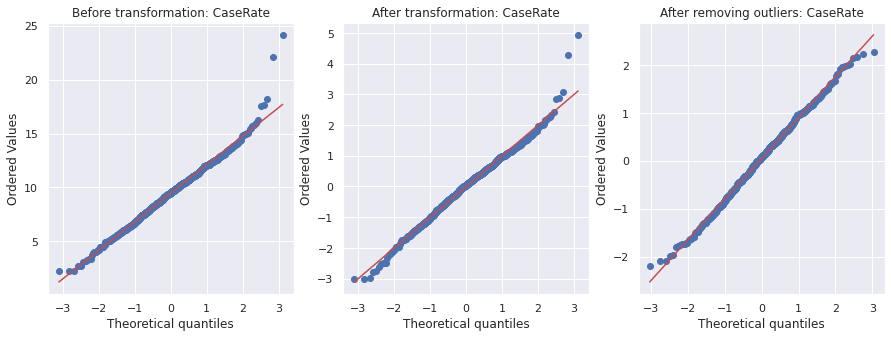

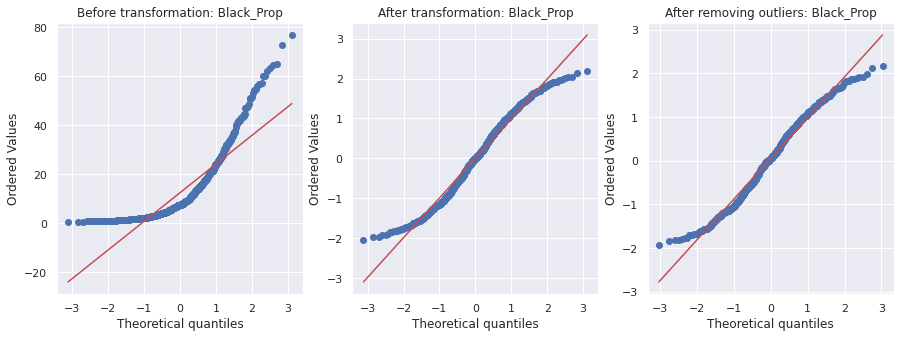

In [24]:
#Visualizing Q-Q Plot to see normality after transforming and  removing outliers
for var in numvars:
  fig, axes = plt.subplots(1,3,figsize=(15, 5))
  prob1 = stats.probplot(df[var], dist=stats.norm, plot=axes[0])
  axes[0].set_title('Before transformation: '+ var)
  prob2 = stats.probplot(df_t[var], dist=stats.norm, plot=axes[1])
  axes[1].set_title('After transformation: '+ var)
  prob3 = stats.probplot(df_nout[var], dist=stats.norm, plot=axes[2])
  axes[2].set_title('After removing outliers: '+ var)

In [25]:
# checking the data and its shape after removing outlier
print("Shape of dataframe before outliers removal",df.shape)
print("Shape of dataframe after outliers removal",df_nout.shape)

Shape of dataframe before outliers removal (756, 17)
Shape of dataframe after outliers removal (572, 31)


In [26]:
#Train_Test_Split the datast
df_train_nout = df_nout[df_nout['Test']==0]
df_train_nout = df_train_nout.drop(['Test'],axis=1)
df_test_nout = df_nout[df_nout['Test']==1]
df_test_nout = df_test_nout.drop(['Test'],axis=1)

In [27]:
# standardization the dataset 
scaler = MinMaxScaler()
df_train_nout[numvars] = scaler.fit_transform(df_train_nout[numvars])
df_train_nout.head()

,IT_WholeRate,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,CvdVax_DisparityY,vehicle,FacNumRate,CaseRate,Black_Prop,State_California,State_Illinois,State_Indiana,State_Maine,State_New Jersey,State_New York,State_North Carolina,State_Ohio,State_Oregon,State_Pennsylvania,State_South Carolina,State_Tennessee,State_Texas,State_Virginia,State_West Virginia,State_Wisconsin
1,0.710650,0.360683,0.748067,1,0.056094,0.261460,0.333485,0.460989,0.548414,0.542958,0.464446,0.417821,0.128431,0.147295,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.617534,0.493327,0.210673,0,0.128834,0.321936,0.871558,0.298338,0.806378,0.586638,0.613079,0.440310,0.564497,0.077090,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.748683,0.435582,0.706144,1,0.056577,0.068765,0.567374,0.397704,0.126497,0.416512,0.742714,0.397361,0.107518,0.037658,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0.541810,0.225178,0.628690,1,0.270505,0.321936,0.871558,0.623730,0.778993,0.829779,0.449884,0.413823,0.981148,0.266669,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0.489650,0.458856,0.353004,1,0.141723,0.438276,0.692147,0.456510,0.522802,0.527959,0.526452,0.553953,0.938797,0.457508,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# prepared the data and split for train and test
y_train = df_train_nout.pop("CvdVax_DisparityY")
X_train = df_train_nout
df_test_nout[numvars] = scaler.transform(df_test_nout[numvars])
y_test = df_test_nout.pop("CvdVax_DisparityY")
X_test = df_test_nout

In [83]:
# Defining the function for calculation of different metric value
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Linear Regression 


In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [85]:
# Ealuation Report
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.08515997890676943
MSE: 0.013258112466463693
RMSE: 0.11514387724262065
R2 Square 0.6522147874583271
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.08112165134027223
MSE: 0.0117225144182209
RMSE: 0.10827056117994817
R2 Square 0.6782661710432527
__________________________________


In [86]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.08516,0.013258,0.115144,0.652215


**Linear Regression OLS**

In [87]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train) #for adding intercept
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params #all parameters (intercept + coefficient)

array([ 5.16239970e-01,  1.85537789e-01, -4.03710597e-01,  1.15673406e-01,
       -2.08977212e-02, -2.86070788e-02,  3.31564118e-02,  1.08023308e-01,
        3.51660375e-02,  5.09284891e-02, -1.13350116e-01,  1.19809504e-03,
        1.57646010e-01, -2.26846235e-01, -3.61980573e-02,  2.64946992e-01,
        2.12693689e-01, -2.39936371e-01,  2.20524196e-01,  8.48887059e-02,
       -8.54308216e-02,  5.55758140e-03, -9.78361213e-18,  2.58139667e-02,
       -1.00568887e-02, -2.27879138e-02,  7.92155171e-02, -2.84071658e-02,
        1.29070239e-02,  3.25095157e-02])

In [88]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     29.59
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           1.01e-76
Time:                        16:25:42   Log-Likelihood:                 327.30
No. Observations:                 407   AIC:                            -598.6
Df Residuals:                     379   BIC:                            -486.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5162      0.075      6.899      0.000       0.369       0.663
x1             0.1855      0.052      3.598      0.000       0.084       0.287
x2            -0.4037      0.050     -8.030      0.000      -0.503      -0.305
x3             0.1157      0.042      2.737      0.006       0.033       0.199
x4            -0.0209      0.015     -1.434      0.152      -0.050       0.008
x5            -0.0286      0.041     -0.699      0.485      -0.109       0.052
x6             0.0332      0.080      0.414      0.679      -0.124       0.190
x7             0.1080      0.038      2.880      0.004       0.034       0.182
x8             0.0352      0.037      0.941      0.347      -0.038       0.109
x9             0.0509      0.038      1.357      0.175      -0.023       0.125
x10           -0.1134      0.053     -2.139      0.033      -0.218      -0.009
x11            0.0012      0.036      0.033      0.974      -0.070       0.073
x12            0.1576      0.039      4.018      0.000       0.081       0.235
x13           -0.2268      0.045     -5.075      0.000      -0.315      -0.139
x14           -0.0362      0.034     -1.073      0.284      -0.103       0.030
x15            0.2649      0.026     10.283      0.000       0.214       0.316
x16            0.2127      0.027      7.893      0.000       0.160       0.266
x17           -0.2399      0.110     -2.178      0.030      -0.457      -0.023
x18            0.2205      0.045      4.937      0.000       0.133       0.308
x19            0.0849      0.026      3.228      0.001       0.033       0.137
x20           -0.0854      0.027     -3.130      0.002      -0.139      -0.032
x21            0.0056      0.030      0.184      0.854      -0.054       0.065
x22        -9.784e-18   9.15e-18     -1.069      0.286   -2.78e-17     8.2e-18
x23            0.0258      0.024      1.057      0.291      -0.022       0.074
x24           -0.0101      0.036     -0.279      0.781      -0.081       0.061
x25           -0.0228      0.040     -0.575      0.566      -0.101       0.055
x26            0.0792      0.022      3.581      0.000       0.036       0.123
x27           -0.0284      0.022     -1.289      0.198      -0.072       0.015
x28            0.0129      0.047      0.274      0.784      -0.080       0.105
x29            0.0325      0.036      0.909      0.364      -0.038       0.103
==============================================================================
Omnibus:                       21.975   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.526
Skew:                          -0.320   Prob(JB):                     9.61e-10
Kurtosis:                       4.428   Cond. No.                     2.01e+16
==============================================================================

W

Robust Regression


In [89]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=400)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.08892472045358997
MSE: 0.013881675932722666
RMSE: 0.11782052424226717
R2 Square 0.6358575455662658
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.08716749273621148
MSE: 0.014308182842733016
RMSE: 0.11961681672211903
R2 Square 0.6073004231711252
__________________________________


In [90]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.085160,0.013258,0.115144,0.652215
1,Robust Regression,0.088925,0.013882,0.117821,0.635858


Ridge Regression

In [91]:
# First we optimize hyperparameter through cross-validation and grid search
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 10, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.088
Config: {'alpha': 0.76}


In [92]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.76, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.08407158527689396
MSE: 0.01302254602360871
RMSE: 0.11411637053292883
R2 Square 0.6583941380712622
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.08145229146012285
MSE: 0.01183204198435687
RMSE: 0.10877519011409205
R2 Square 0.6752600989692901
__________________________________


In [93]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) ]],  columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.085160,0.013258,0.115144,0.652215
1,Robust Regression,0.088925,0.013882,0.117821,0.635858
2,Ridge Regression,0.084072,0.013023,0.114116,0.658394


Lasso Regression

In [94]:
# First we optimize hyperparameter through cross-validation and grid search
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 10, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.088
Config: {'alpha': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3855397218415075, tolerance: 0.001482922508859742
  positive)


In [95]:
model = Lasso(alpha=0)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.08515921635544639
MSE: 0.013262034883745845
RMSE: 0.1151609086615152
R2 Square 0.652111895079672
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.08113883533001988
MSE: 0.011722553915683064
RMSE: 0.1082707435814637
R2 Square 0.6782650870036617
__________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3855397218415075, tolerance: 0.001482922508859742
  positive)


In [96]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.085160,0.013258,0.115144,0.652215
1,Robust Regression,0.088925,0.013882,0.117821,0.635858
2,Ridge Regression,0.084072,0.013023,0.114116,0.658394
3,Ridge Regression,0.085159,0.013262,0.115161,0.652112


Elastic Net Regression

In [97]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0, l1_ratio=0.4, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.08515921635544636
MSE: 0.013262034883745858
RMSE: 0.11516090866151525
R2 Square 0.6521118950796717
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.08113883533001992
MSE: 0.011722553915683064
RMSE: 0.1082707435814637
R2 Square 0.6782650870036617
__________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3855397218415053, tolerance: 0.001482922508859742
  positive)


In [98]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.085160,0.013258,0.115144,0.652215
1,Robust Regression,0.088925,0.013882,0.117821,0.635858
2,Ridge Regression,0.084072,0.013023,0.114116,0.658394
3,Ridge Regression,0.085159,0.013262,0.115161,0.652112
4,Elastic Net Regression,0.085159,0.013262,0.115161,0.652112


Artificial Neural Network

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)


Epoch 1/100
407/407 [==============================] - 1s 2ms/step - loss: 0.1606 - val_loss: 0.0684
Epoch 2/100
407/407 [==============================] - 1s 2ms/step - loss: 0.0529 - val_loss: 0.0386
Epoch 3/100
407/407 [==============================] - 1s 2ms/step - loss: 0.0395 - val_loss: 0.0371
Epoch 4/100
407/407 [==============================] - 1s 2ms/step - loss: 0.0375 - val_loss: 0.0361
Epoch 5/100
407/407 [==============================] - 1s 2ms/step - loss: 0.0367 - val_loss: 0.0351
Epoch 6/100
407/407 [==============================] - 1s 2ms/step - loss: 0.0365 - val_loss: 0.0340
Epoch 7/100
407/407 [==============================] - 1s 2ms/step - loss: 0.0339 - val_loss: 0.0333
Epoch 8/100
407/407 [==============================] - 1s 2ms/step - loss: 0.0322 - val_loss: 0.0322
Epoch 9/100
407/407 [==============================] - 1s 2ms/step - loss: 0.0324 - val_loss: 0.0315
Epoch 10/100
407/407 [==============================] - 1s 2ms/step - loss: 0.0300 - val_lo

In [100]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.09980621646165594
MSE: 0.016807185594104993
RMSE: 0.12964253003588364
R2 Square 0.5591159277869477
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.09879437666468505
MSE: 0.015352296722900843
RMSE: 0.12390438540625123
R2 Square 0.5786438786322563
__________________________________


In [101]:
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.085160,0.013258,0.115144,0.652215
1,Robust Regression,0.088925,0.013882,0.117821,0.635858
2,Ridge Regression,0.084072,0.013023,0.114116,0.658394
3,Ridge Regression,0.085159,0.013262,0.115161,0.652112
4,Elastic Net Regression,0.085159,0.013262,0.115161,0.652112
5,Artficial Neural Network,0.099806,0.016807,0.129643,0.559116


Random Forest Regression

In [102]:
# Grid  Search to find best Parameter
from sklearn.model_selection import GridSearchCV
param_grid = {'bootstrap': [True], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': [2, 3],'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12],
'n_estimators': [100, 200, 300, 1000]}

In [103]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# grid_search_rf.fit(X_train,y_train)

In [104]:
rf_reg = RandomForestRegressor(
 n_estimators= 1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.10303969344813488
MSE: 0.01804900032771102
RMSE: 0.1343465679789068
R2 Square 0.5265407929661349
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03603471983407787
MSE: 0.0022272527811584937
RMSE: 0.04719377905146497
R2 Square 0.9388712574989145
__________________________________


In [105]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.085160,0.013258,0.115144,0.652215
1,Robust Regression,0.088925,0.013882,0.117821,0.635858
2,Ridge Regression,0.084072,0.013023,0.114116,0.658394
3,Ridge Regression,0.085159,0.013262,0.115161,0.652112
4,Elastic Net Regression,0.085159,0.013262,0.115161,0.652112
5,Artficial Neural Network,0.099806,0.016807,0.129643,0.559116
6,Random Forest Regressor,0.103040,0.018049,0.134347,0.526541


Support Vector Regression

In [106]:
# Grid  Search to find best Parameter
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVR(),param_grid,refit=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [107]:
print(grid.best_estimator_)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [108]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf',epsilon=0.04)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.07587201873218777
MSE: 0.010247655529997238
RMSE: 0.10123070448237155
R2 Square 0.7311847319466469
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05645402818067346
MSE: 0.006059785926807631
RMSE: 0.07784462683324798
R2 Square 0.8336843053176707
__________________________________


In [109]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,0.085160,0.013258,0.115144,0.652215
1,Robust Regression,0.088925,0.013882,0.117821,0.635858
2,Ridge Regression,0.084072,0.013023,0.114116,0.658394
3,Ridge Regression,0.085159,0.013262,0.115161,0.652112
4,Elastic Net Regression,0.085159,0.013262,0.115161,0.652112
5,Artficial Neural Network,0.099806,0.016807,0.129643,0.559116
6,Random Forest Regressor,0.103040,0.018049,0.134347,0.526541
7,SVM Regressor,0.075872,0.010248,0.101231,0.731185


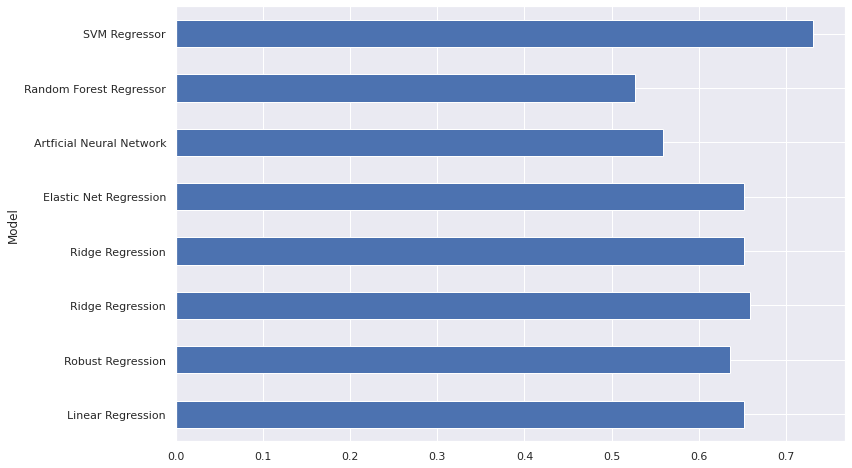

In [110]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

In [115]:
def coefplot(results):
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    coef_df.columns = coef_df.iloc[0]
    coef_df=coef_df.drop(0)
    coef_df = coef_df.set_index(coef_df.columns[0])
    coef_df = coef_df.astype(float)
    errors = coef_df['coef'] - coef_df['[0.025']
    coef_df['errors'] = errors
    coef_df = coef_df.drop(['const'])
    coef_df = coef_df.sort_values(by=['coef'])
    variables = list(coef_df.index.values)
    coef_df['variables'] = variables
    sns.set_context("poster")
    fig, ax = plt.subplots(figsize=(15, 10))
    coef_df.plot(x='variables', y='coef', kind='bar',ax=ax, color='none', ecolor='steelblue',capsize=0,yerr='errors', legend=False)
    plt.title('Coefficients of Features with 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients')
    ax.set_xlabel('')
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), marker='o', s=80, y=coef_df['coef'], color='steelblue')
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    return plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


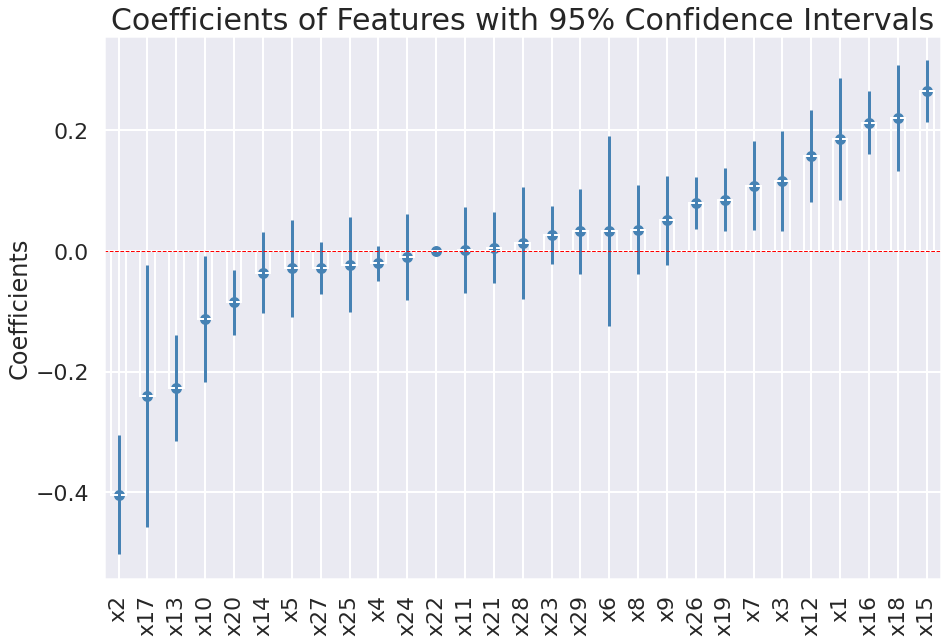

In [114]:
coefplot(lr)

Feature Importance in Linear Regression With Shap plot

Using 165 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/165 [00:00<?, ?it/s]

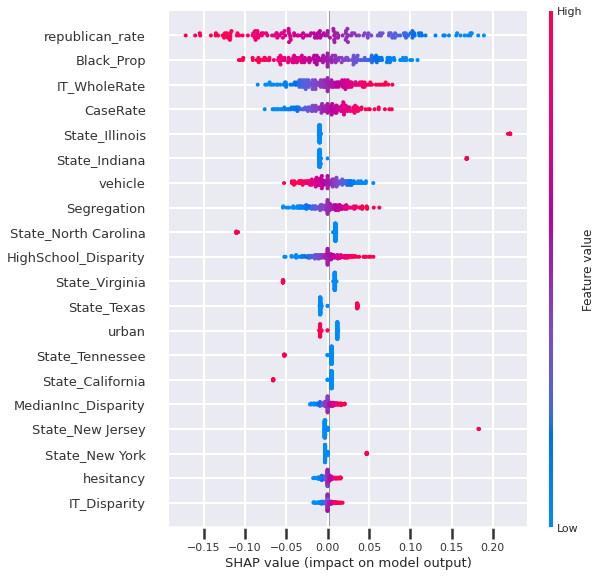

In [ ]:
lrmodel_explainer = shap.KernelExplainer(lin_reg.predict, X_test)
lrmodel_shap_values = lrmodel_explainer.shap_values(X_test)
shap.summary_plot(lrmodel_shap_values, X_test)

Feature Importance in Ridge Regression With Shap plot

Using 165 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/165 [00:00<?, ?it/s]

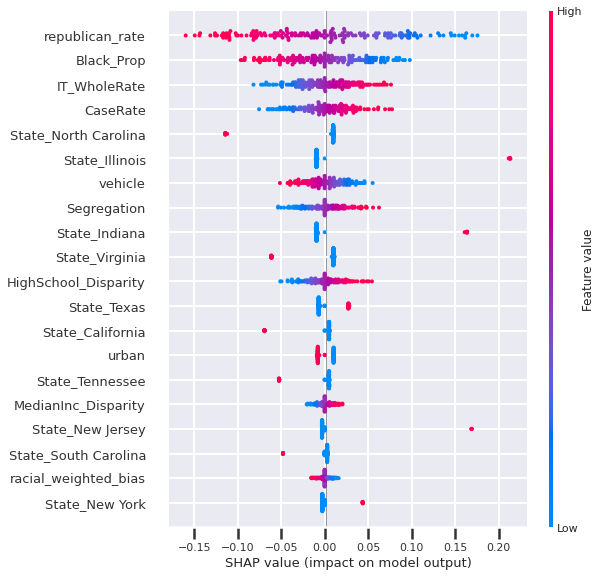

In [ ]:
ridge_explainer = shap.KernelExplainer(ridge.predict, X_test)
ridge_shap_values = ridge_explainer.shap_values(X_test)
shap.summary_plot(ridge_shap_values, X_test)

Feature Importance in Lasso Regression With Shap plot

Using 165 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/165 [00:00<?, ?it/s]

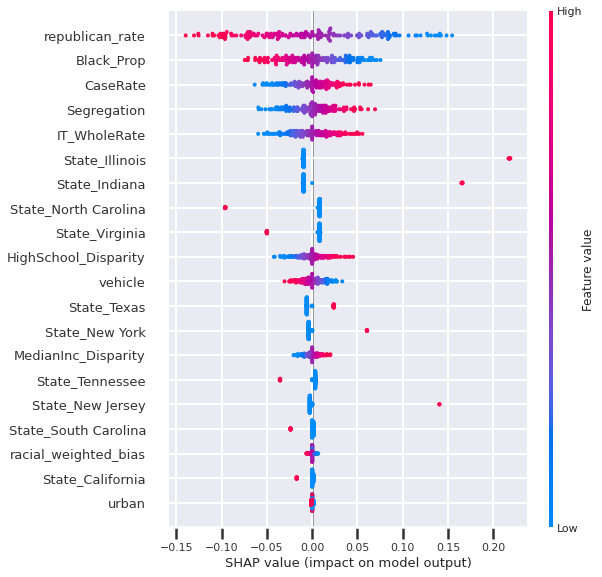

In [ ]:
lasso_explainer = shap.KernelExplainer(lasso.predict, X_test)
lasso_shap_values = lasso_explainer.shap_values(X_test)
shap.summary_plot(lasso_shap_values, X_test)

Feature Importance in Support Vector Regression With Shap plot

Using 165 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/165 [00:00<?, ?it/s]

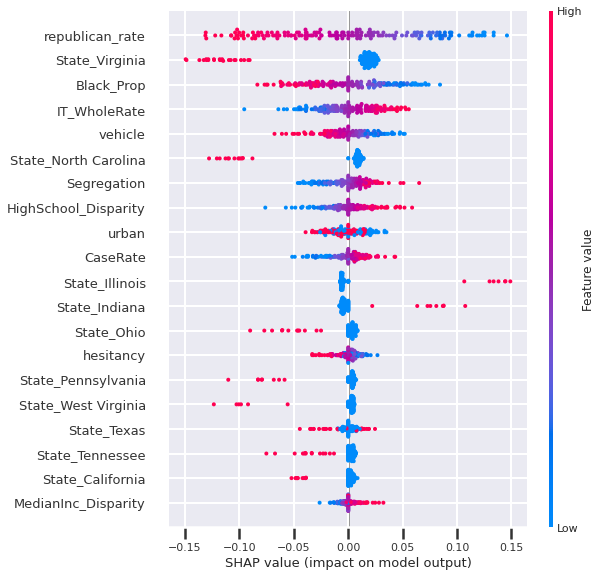

In [ ]:
svm_explainer = shap.KernelExplainer(svr.predict, X_test)
svm_shap_values = svm_explainer.shap_values(X_test)

shap.summary_plot(svm_shap_values, X_test)

Feature Importance in Random Forest Regression With Shap plot

Using 165 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/165 [00:00<?, ?it/s]

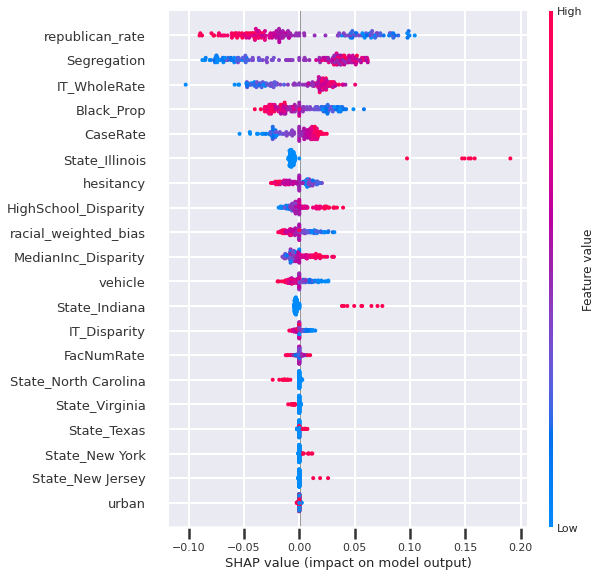

In [ ]:
rf_explainer = shap.KernelExplainer(rf_reg.predict, X_test)
rf_shap_values = rf_explainer.shap_values(X_test)
shap.summary_plot(rf_shap_values, X_test)

Feature Importance in Artificial Neural Network Regression With Shap plot

Using 165 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/165 [00:00<?, ?it/s]

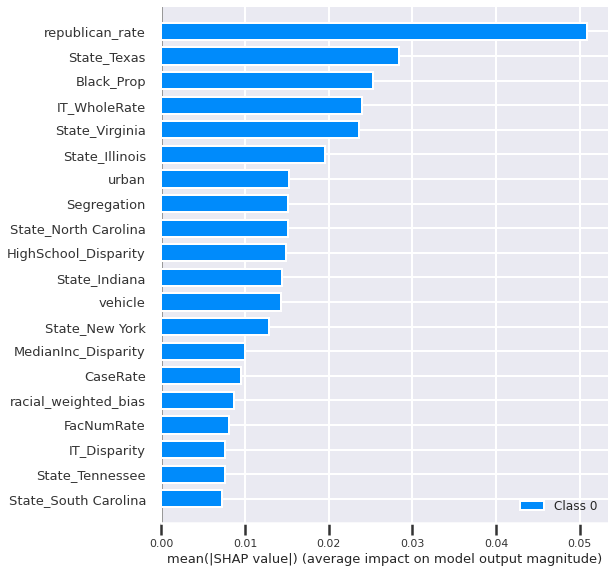

In [ ]:
nn_explainer = shap.KernelExplainer(model.predict, X_test)
nn_shap_values = nn_explainer.shap_values(X_test)
shap.summary_plot(nn_shap_values, X_test)